# SeriesGAN: Time Series Generation via Adversarial and Autoregressive Learning

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import logging
tf.get_logger().setLevel(logging.ERROR)

# 1. SeriesGan model
from seriesgan import seriesgan

# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

## Data Loading

Load original dataset and preprocess the loaded data.


In [2]:
original_data = []
generated_data = []

In [3]:
## Data loading
data_name = 'stock'
seq_len = 24

if data_name in ['stock', 'electricity', 'ECG']:
  original_data.append(real_data_loading(data_name, seq_len))

print(data_name + ' dataset is ready.')

stock dataset is ready.


In [4]:
## Data loading
data_name = 'sine'
seq_len = 64

if data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 4
  original_data.append(sine_data_generation(no, seq_len, dim))
    
print(data_name + ' dataset is ready.')

sine dataset is ready.


In [5]:
## Data loading
data_name = 'ECG'
seq_len = 140

if data_name in ['stock', 'electricity', 'ECG']:
  original_data.append(real_data_loading(data_name, seq_len))
   
print(data_name + ' dataset is ready.')

ECG dataset is ready.


## Set network parameters

SeriesGAN network parameters should be optimized for different datasets.

- hidden_dim: hidden dimensions -> input 'same' or a number such as 8
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [7]:
## Newtork parameters
parameters = dict()

parameters['hidden_dim'] = 'same'
parameters['iterations'] = 7 * 1000
parameters['batch_size'] = 128
parameters['num_layer'] = 4

## Run synthetic time-series data generation

SeriesGAN uses the original data and network parameters to return the generated synthetic data.

It also utilizes the number of samples that need to be generated. If you enter 'same', it will produce an equal number of synthetic samples to match the real samples that you have. Otherwise, please enter a specific number.

# Stocks

In [8]:
seriesgan_result = seriesgan(original_data[0], parameters, 'same')

Start Autoencoder Training for Loss
step: 0/6000, AE_loss: 0.1331
step: 1000/6000, AE_loss: 0.0011
step: 2000/6000, AE_loss: 0.0006
step: 3000/6000, AE_loss: 0.0005
step: 4000/6000, AE_loss: 0.0006
step: 5000/6000, AE_loss: 0.0005
step: 5998/6000, AE_loss: 0.0004
Finish Autoencoder Training for Loss
Start Embedding Network Training
step: 0/6000, AE_loss: 0.3908, AE_D_loss: 0.944
step: 1000/6000, AE_loss: 0.0458, AE_D_loss: 0.3997
step: 2000/6000, AE_loss: 0.0312, AE_D_loss: 0.4822
step: 3000/6000, AE_loss: 0.026, AE_D_loss: 0.5148
step: 4000/6000, AE_loss: 0.0223, AE_D_loss: 0.491
step: 5000/6000, AE_loss: 0.0206, AE_D_loss: 0.4992
step: 5998/6000, AE_loss: 0.0198, AE_D_loss: 0.4941
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/6000, S_loss: 0.7358
step: 1000/6000, S_loss: 0.0072
step: 2000/6000, S_loss: 0.0013
step: 3000/6000, S_loss: 0.0008
step: 4000/6000, S_loss: 0.0008
step: 5000/6000, S_loss: 0.0005
step: 5999/6000, S_loss: 0.0005
Finish Train

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [16]:
metric_iteration = 5
 
discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(original_data[0], seriesgan_result)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))
print(f'Discriminative Score Std: {np.round(np.std(discriminative_score), 4)}')

Discriminative score: 0.1873
Discriminative Score Std: 0.0823


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [17]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(original_data[0], seriesgan_result)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))
print(f'Predictive Score Std: {np.round(np.std(predictive_score), 4)}')

Predictive score: 0.041
Predictive Score Std: 0.0002


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

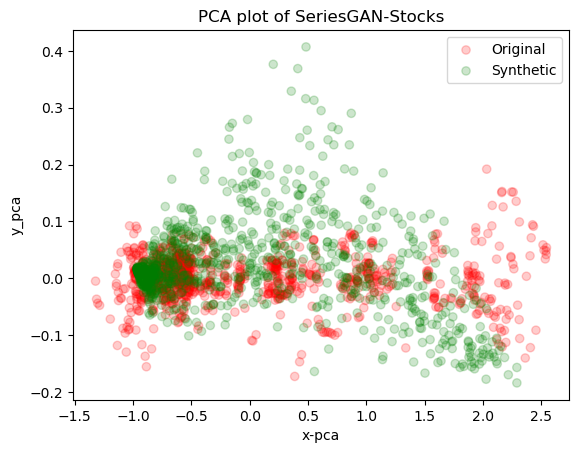

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.018284
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.131485
[t-SNE] KL divergence after 300 iterations: 1.019804


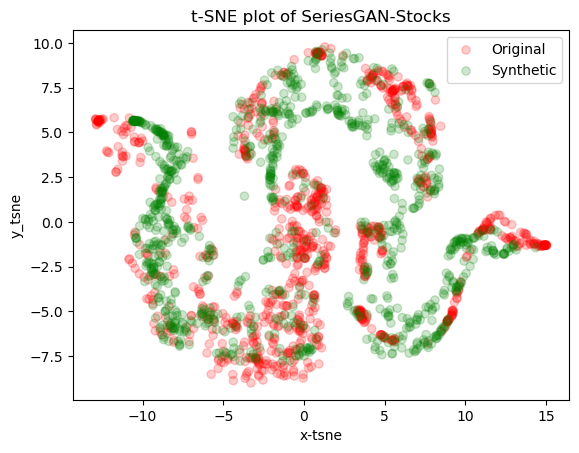

In [19]:
visualization(original_data[0], seriesgan_result, 'pca', 'SeriesGAN-Stocks')
visualization(original_data[0], seriesgan_result, 'tsne', 'SeriesGAN-Stocks')

# Sines

In [50]:
seriesgan_result = seriesgan(original_data[1], parameters, 'same')

Start Autoencoder Training for Loss
step: 0/7000, AE_loss: 0.5468
step: 1000/7000, AE_loss: 0.0325
step: 2000/7000, AE_loss: 0.0318
step: 3000/7000, AE_loss: 0.0283
step: 4000/7000, AE_loss: 0.0279
step: 5000/7000, AE_loss: 0.0326
step: 6000/7000, AE_loss: 0.021
step: 6998/7000, AE_loss: 0.0192
Finish Autoencoder Training for Loss
Start Embedding Network Training
step: 0/7000, AE_loss: 0.7438, AE_D_loss: 0.9444
step: 1000/7000, AE_loss: 0.2487, AE_D_loss: 0.3411
step: 2000/7000, AE_loss: 0.237, AE_D_loss: 0.4886
step: 3000/7000, AE_loss: 0.2432, AE_D_loss: 0.4442
step: 4000/7000, AE_loss: 0.2388, AE_D_loss: 0.2011
step: 5000/7000, AE_loss: 0.2405, AE_D_loss: 0.1923
step: 6000/7000, AE_loss: 0.2445, AE_D_loss: 0.1502
step: 6998/7000, AE_loss: 0.2413, AE_D_loss: 0.165
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/7000, S_loss: 4.4842
step: 1000/7000, S_loss: 0.0096
step: 2000/7000, S_loss: 0.003
step: 3000/7000, S_loss: 0.0023
step: 4000/7000, S_loss:

In [13]:
metric_iteration = 5
 
discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(original_data[1], seriesgan_result)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))
print(f'Discriminative Score Std: {np.round(np.std(discriminative_score), 4)}')

Discriminative score: 0.2083
Discriminative Score Std: 0.0869


In [10]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(original_data[1], seriesgan_result)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))
print(f'Predictive Score Std: {np.round(np.std(predictive_score), 4)}')

Predictive score: 0.2232
Predictive Score Std: 0.0018


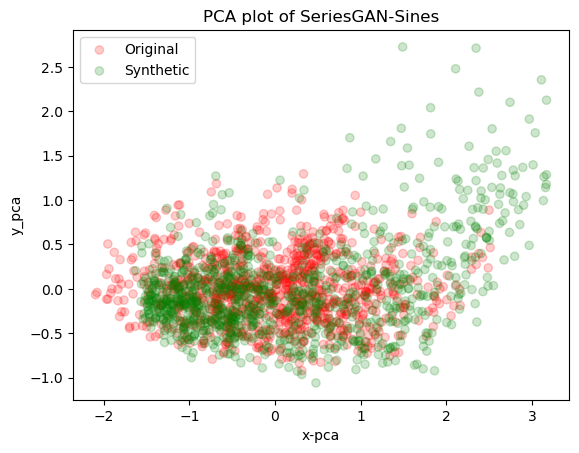

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.091s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.189087
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.448715
[t-SNE] KL divergence after 300 iterations: 1.361009


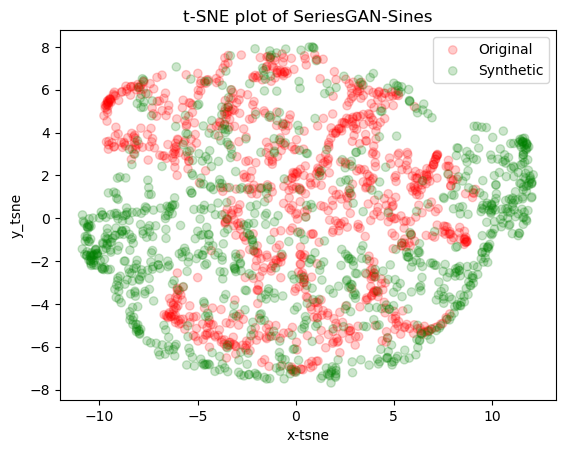

In [8]:
visualization(original_data[1], seriesgan_result, 'pca', 'SeriesGAN-Sines')
visualization(original_data[1], seriesgan_result, 'tsne', 'SeriesGAN-Sines')

# ECG

In [8]:
seriesgan_result = seriesgan(original_data[2], parameters, 'same')

Start Autoencoder Training for Loss
step: 0/7000, AE_loss: 0.5235
step: 1000/7000, AE_loss: 0.0265
step: 2000/7000, AE_loss: 0.017
step: 3000/7000, AE_loss: 0.0151
step: 4000/7000, AE_loss: 0.0127
step: 5000/7000, AE_loss: 0.0114
step: 6000/7000, AE_loss: 0.0134
step: 6998/7000, AE_loss: 0.0118
Finish Autoencoder Training for Loss
Start Embedding Network Training
step: 0/7000, AE_loss: 0.7203, AE_D_loss: 1.0101
step: 1000/7000, AE_loss: 0.1711, AE_D_loss: 0.4971
step: 2000/7000, AE_loss: 0.1773, AE_D_loss: 0.1638
step: 3000/7000, AE_loss: 0.1589, AE_D_loss: 0.1612
step: 4000/7000, AE_loss: 0.1462, AE_D_loss: 0.1684
step: 5000/7000, AE_loss: 0.1496, AE_D_loss: 0.1533
step: 6000/7000, AE_loss: 0.0623, AE_D_loss: 0.3687
step: 6998/7000, AE_loss: 0.0318, AE_D_loss: 0.4559
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/7000, S_loss: 0.0141
step: 1000/7000, S_loss: 0.0045
step: 2000/7000, S_loss: 0.0025
step: 3000/7000, S_loss: 0.0022
step: 4000/7000, S_lo

In [51]:
metric_iteration = 5
 
discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(original_data[2], seriesgan_result)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))
print(f'Discriminative Score Std: {np.round(np.std(discriminative_score), 4)}')

Discriminative score: 0.1691
Discriminative Score Std: 0.0234


In [69]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(original_data[2], seriesgan_result)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))
print(f'Discriminative Score Std: {np.round(np.std(predictive_score), 4)}')

Predictive score: 0.1268
Discriminative Score Std: 0.0007


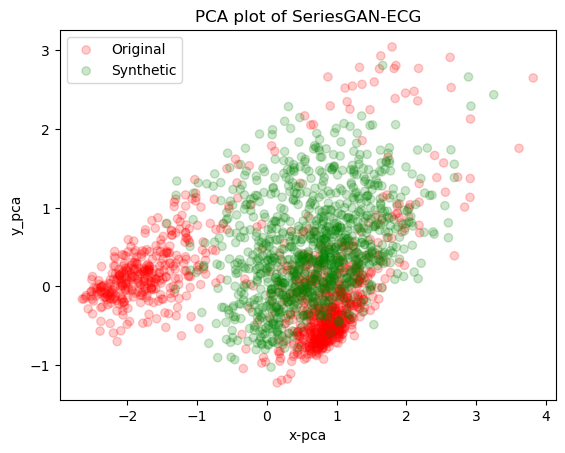

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.430153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.777962
[t-SNE] KL divergence after 300 iterations: 2.305993


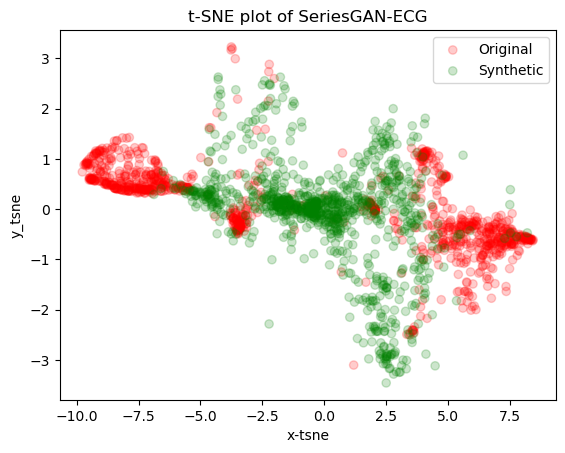

In [49]:
visualization(original_data[2], seriesgan_result, 'pca', 'SeriesGAN-ECG')
visualization(np.array(original_data[2]), np.array(seriesgan_result), 'tsne', 'SeriesGAN-ECG')